In [1]:
#define the custom Vector type as in class 7 for later use

from typing import List

Vector = List[float]

def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "summands have different lengths"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, "no vectors provided; for zero vector, construct manually"
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "vectors have different sizes"
    
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "minuend and subtrahend have different lengths"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1 / n, vector_sum(vectors))

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "vectors have different lengths"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def norm_square(v: Vector) -> float:
    """Computes the sum of a squares of components of v"""
    return dot(v, v)

def norm(v: Vector) -> float:
    return math.sqrt(norm_square(v))

def distance(v: Vector, w: Vector) -> float:
    return norm(vector_subtract(v, w))

In [2]:
def f(x, y):
    return norm_square([x, y])

In [3]:
f(1, 2)

5

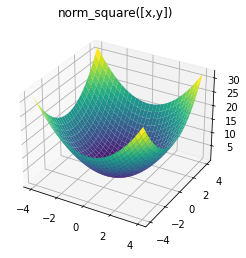

In [4]:
#plotting a float-valued function of two floats
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-4, 4, 30)
y = np.linspace(-4, 4, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('norm_square([x,y])');

In [37]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

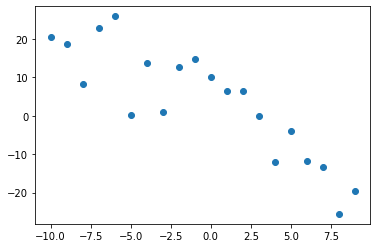

In [20]:
inputs = [(x, - 2 * x + 4 + 6 * np.random.normal()) for x in range(-10, 10)]
x_components, y_components = [i[0] for i in inputs], [i[1] for i in inputs]

fig, ax = plt.subplots()
ax.scatter(x_components, y_components)

In [38]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

def gradient_step(theta: Vector, grad: Vector, learning_rate: float):
    return add(theta, scalar_multiply(learning_rate, grad))

In [42]:
import random

#set the learning rate
learning_rate = 0.02

#pick a random starting point
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

#iterate gradient descent
for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [-3.0461174447632775, 0.8274563575810563]
1 [-1.842069495898937, 0.8850856951525479]
2 [-2.250293211761383, 0.9644908181984666]
3 [-2.1099090459072327, 1.0325552620052996]
4 [-2.1562783734215074, 1.1007048113769422]
5 [-2.1391498110792213, 1.1652009922234337]
6 [-2.1436835986586686, 1.2274598970829111]
7 [-2.140896932784467, 1.2871377699964206]
8 [-2.140650841723425, 1.3444842613108738]
9 [-2.1395875828578905, 1.3995418147939698]
10 [-2.13884793980251, 1.4524183313150525]
11 [-2.138041888110918, 1.5031945800363995]
12 [-2.1373004207116324, 1.5519558998427245]
13 [-2.136577293231263, 1.5987815962047822]
14 [-2.1358866426473475, 1.643748727261965]
15 [-2.1352221212247353, 1.6869309860885389]
16 [-2.134584413331892, 1.728399244990502]
17 [-2.133971868837419, 1.7682215276942432]
18 [-2.133383688311465, 1.8064631699797244]
19 [-2.1328188368445797, 1.8431869101843055]
20 [-2.1322764115392294, 1.878452997810041]
21 [-2.131755514390534, 1.9123192904368542]
22 [-2.131255293568554, 1.944841349

938 [-2.1191530705902806, 2.7316719839548385]
939 [-2.1191530705902806, 2.7316719839548385]
940 [-2.1191530705902806, 2.7316719839548385]
941 [-2.1191530705902806, 2.7316719839548385]
942 [-2.1191530705902806, 2.7316719839548385]
943 [-2.1191530705902806, 2.7316719839548385]
944 [-2.1191530705902806, 2.7316719839548385]
945 [-2.1191530705902806, 2.7316719839548385]
946 [-2.1191530705902806, 2.7316719839548385]
947 [-2.1191530705902806, 2.7316719839548385]
948 [-2.1191530705902806, 2.7316719839548385]
949 [-2.1191530705902806, 2.7316719839548385]
950 [-2.1191530705902806, 2.7316719839548385]
951 [-2.1191530705902806, 2.7316719839548385]
952 [-2.1191530705902806, 2.7316719839548385]
953 [-2.1191530705902806, 2.7316719839548385]
954 [-2.1191530705902806, 2.7316719839548385]
955 [-2.1191530705902806, 2.7316719839548385]
956 [-2.1191530705902806, 2.7316719839548385]
957 [-2.1191530705902806, 2.7316719839548385]
958 [-2.1191530705902806, 2.7316719839548385]
959 [-2.1191530705902806, 2.731671

1776 [-2.1191530705902806, 2.7316719839548385]
1777 [-2.1191530705902806, 2.7316719839548385]
1778 [-2.1191530705902806, 2.7316719839548385]
1779 [-2.1191530705902806, 2.7316719839548385]
1780 [-2.1191530705902806, 2.7316719839548385]
1781 [-2.1191530705902806, 2.7316719839548385]
1782 [-2.1191530705902806, 2.7316719839548385]
1783 [-2.1191530705902806, 2.7316719839548385]
1784 [-2.1191530705902806, 2.7316719839548385]
1785 [-2.1191530705902806, 2.7316719839548385]
1786 [-2.1191530705902806, 2.7316719839548385]
1787 [-2.1191530705902806, 2.7316719839548385]
1788 [-2.1191530705902806, 2.7316719839548385]
1789 [-2.1191530705902806, 2.7316719839548385]
1790 [-2.1191530705902806, 2.7316719839548385]
1791 [-2.1191530705902806, 2.7316719839548385]
1792 [-2.1191530705902806, 2.7316719839548385]
1793 [-2.1191530705902806, 2.7316719839548385]
1794 [-2.1191530705902806, 2.7316719839548385]
1795 [-2.1191530705902806, 2.7316719839548385]
1796 [-2.1191530705902806, 2.7316719839548385]
1797 [-2.1191

2628 [-2.1191530705902806, 2.7316719839548385]
2629 [-2.1191530705902806, 2.7316719839548385]
2630 [-2.1191530705902806, 2.7316719839548385]
2631 [-2.1191530705902806, 2.7316719839548385]
2632 [-2.1191530705902806, 2.7316719839548385]
2633 [-2.1191530705902806, 2.7316719839548385]
2634 [-2.1191530705902806, 2.7316719839548385]
2635 [-2.1191530705902806, 2.7316719839548385]
2636 [-2.1191530705902806, 2.7316719839548385]
2637 [-2.1191530705902806, 2.7316719839548385]
2638 [-2.1191530705902806, 2.7316719839548385]
2639 [-2.1191530705902806, 2.7316719839548385]
2640 [-2.1191530705902806, 2.7316719839548385]
2641 [-2.1191530705902806, 2.7316719839548385]
2642 [-2.1191530705902806, 2.7316719839548385]
2643 [-2.1191530705902806, 2.7316719839548385]
2644 [-2.1191530705902806, 2.7316719839548385]
2645 [-2.1191530705902806, 2.7316719839548385]
2646 [-2.1191530705902806, 2.7316719839548385]
2647 [-2.1191530705902806, 2.7316719839548385]
2648 [-2.1191530705902806, 2.7316719839548385]
2649 [-2.1191

3436 [-2.1191530705902806, 2.7316719839548385]
3437 [-2.1191530705902806, 2.7316719839548385]
3438 [-2.1191530705902806, 2.7316719839548385]
3439 [-2.1191530705902806, 2.7316719839548385]
3440 [-2.1191530705902806, 2.7316719839548385]
3441 [-2.1191530705902806, 2.7316719839548385]
3442 [-2.1191530705902806, 2.7316719839548385]
3443 [-2.1191530705902806, 2.7316719839548385]
3444 [-2.1191530705902806, 2.7316719839548385]
3445 [-2.1191530705902806, 2.7316719839548385]
3446 [-2.1191530705902806, 2.7316719839548385]
3447 [-2.1191530705902806, 2.7316719839548385]
3448 [-2.1191530705902806, 2.7316719839548385]
3449 [-2.1191530705902806, 2.7316719839548385]
3450 [-2.1191530705902806, 2.7316719839548385]
3451 [-2.1191530705902806, 2.7316719839548385]
3452 [-2.1191530705902806, 2.7316719839548385]
3453 [-2.1191530705902806, 2.7316719839548385]
3454 [-2.1191530705902806, 2.7316719839548385]
3455 [-2.1191530705902806, 2.7316719839548385]
3456 [-2.1191530705902806, 2.7316719839548385]
3457 [-2.1191

4280 [-2.1191530705902806, 2.7316719839548385]
4281 [-2.1191530705902806, 2.7316719839548385]
4282 [-2.1191530705902806, 2.7316719839548385]
4283 [-2.1191530705902806, 2.7316719839548385]
4284 [-2.1191530705902806, 2.7316719839548385]
4285 [-2.1191530705902806, 2.7316719839548385]
4286 [-2.1191530705902806, 2.7316719839548385]
4287 [-2.1191530705902806, 2.7316719839548385]
4288 [-2.1191530705902806, 2.7316719839548385]
4289 [-2.1191530705902806, 2.7316719839548385]
4290 [-2.1191530705902806, 2.7316719839548385]
4291 [-2.1191530705902806, 2.7316719839548385]
4292 [-2.1191530705902806, 2.7316719839548385]
4293 [-2.1191530705902806, 2.7316719839548385]
4294 [-2.1191530705902806, 2.7316719839548385]
4295 [-2.1191530705902806, 2.7316719839548385]
4296 [-2.1191530705902806, 2.7316719839548385]
4297 [-2.1191530705902806, 2.7316719839548385]
4298 [-2.1191530705902806, 2.7316719839548385]
4299 [-2.1191530705902806, 2.7316719839548385]
4300 [-2.1191530705902806, 2.7316719839548385]
4301 [-2.1191

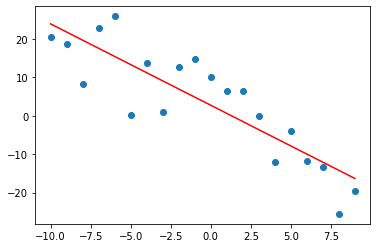

In [29]:
slope, y_intercept = theta

#get endpoints for line segment
x_min, x_max = min(x_components), max(x_components)
y_min, y_max = slope * x_min + y_intercept, slope * x_max + y_intercept

fig, ax = plt.subplots()
ax.scatter(x_components, y_components)

#plot line
ax.plot([x_min, x_max], [y_min, y_max], c = 'red')

In [30]:
from typing import TypeVar, List, Iterator

#allows typing of generic functions
T = TypeVar('T')

def minibatches(dataset:    List[T],
                batch_size:     int,
                shuffle:       bool = True) -> Iterator[List[T]]:
    """Generates minibatches of length batch_size from the dataset at indices 0, batch_size, 2 * batch_size, etc."""
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [31]:
#gradient descent with minibatching

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 5):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [-0.9915067167881538, -0.41271648231948005]
1 [-1.2847398909654937, -0.38535662954596556]
2 [-1.5051549052848445, -0.3552753772044106]
3 [-1.6709100400397146, -0.3266873638248642]
4 [-1.7946802901586574, -0.29973306498242624]
5 [-1.887080549693573, -0.27382051004940683]
6 [-1.9580676178194671, -0.24918888845038062]
7 [-2.012014418309163, -0.22480781722305151]
8 [-2.052293356321975, -0.20020835738679343]
9 [-2.0789215974276285, -0.17633990004214448]
10 [-2.0970135866259976, -0.1526258334044069]
11 [-2.114345281678288, -0.12923552747568806]
12 [-2.1256038253523277, -0.10589256757127057]
13 [-2.135609184104423, -0.08303378254191761]
14 [-2.1428529718127356, -0.060573364506318055]
15 [-2.149401904085067, -0.03816079897196446]
16 [-2.1565183819489566, -0.01631381597283981]
17 [-2.1577480358171766, 0.005320720090116317]
18 [-2.1570887708025164, 0.026891891128566395]
19 [-2.1572126309162916, 0.04835969321175333]
20 [-2.1611962823515882, 0.06997898058864743]
21 [-2.159413996441542, 0.0911240

792 [-2.1231439947152206, 2.6600969239651207]
793 [-2.1193548576947006, 2.6600222787787233]
794 [-2.1129050097539372, 2.6598564195930647]
795 [-2.1169185378772992, 2.6600071136804977]
796 [-2.113881890720295, 2.6599871670801787]
797 [-2.1145433222492174, 2.6600193995575667]
798 [-2.114932611127938, 2.6599169616430243]
799 [-2.1241074924876466, 2.660319411820924]
800 [-2.1244818744892764, 2.660465026425299]
801 [-2.124524599890951, 2.660707193386568]
802 [-2.1245561763105463, 2.660947142345331]
803 [-2.119735558701548, 2.6610373028367342]
804 [-2.1161054326270787, 2.6611355308902382]
805 [-2.1225498095249717, 2.6611168495932658]
806 [-2.127402024452037, 2.6610606950842244]
807 [-2.119061544133508, 2.6610244606379094]
808 [-2.127400955593895, 2.661298945628922]
809 [-2.1254335756324507, 2.66110016964475]
810 [-2.131065613668886, 2.6614983354618125]
811 [-2.127366532081792, 2.661329188657094]
812 [-2.125407492917129, 2.6611302435424733]
813 [-2.1241207508792606, 2.6608417128276804]
814 [-

In [32]:
#stochastic gradient descent

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [-1.7265475169312472, 0.6040370874715408]
1 [-2.1147482362455614, 0.7037896939307868]
2 [-2.2087789762878147, 0.7847561753133406]
3 [-2.2325816185840113, 0.8589884279329745]
4 [-2.239577851408225, 0.9294501136091251]
5 [-2.242513104525049, 0.996933472904173]
6 [-2.2444297412201895, 1.0617094111520677]
7 [-2.2460554584554986, 1.1239212451681984]
8 [-2.247565731334292, 1.1836787554653978]
9 [-2.2490042325952118, 1.2410807438325593]
10 [-2.250383123112488, 1.2962205316475144]
11 [-2.251706978176967, 1.3491873842182172]
12 [-2.2529784976179594, 1.4000669588682082]
13 [-2.2541998705054502, 1.448941515875809]
14 [-2.2553731031862077, 1.4958900687436616]
15 [-2.2565000999333895, 1.5409885160572154]
16 [-2.2575826844896216, 1.5843097651678273]
17 [-2.2586226074198748, 1.625923850291198]
18 [-2.259621549992148, 1.6658980457823662]
19 [-2.260581127146072, 1.704296974906433]
20 [-2.261502890163452, 1.7411827143132996]
21 [-2.262388329190364, 1.7766148943930586]
22 [-2.263238875649566, 1.8106507